In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import mysql.connector

In [217]:
db=yaml.safe_load(open('db.yaml'))
config={
    'user':db['user'],
    'password':db['pwrd'],
    'host':db['host'],
    'database':db['db']
}
cnx=mysql.connector.connect(**config)

query=("""SELECT * 
    FROM mrts_table
    WHERE year(Date)=2007""")


df=pd.read_sql(query, con = cnx)

cnx.close()

In [218]:
df.set_index('Date',inplace=True)

In [219]:
sum(df['Floor covering stores'])

22071

In [209]:
db=yaml.safe_load(open('db.yaml'))
config={
    'user':db['user'],
    'password':db['pwrd'],
    'host':db['host'],
    'database':db['db']
}
cnx=mysql.connector.connect(**config)

query=("""SELECT `Date`, `Retail - food services sales - total`  as sales 
    FROM mrts_table""")

df=pd.read_sql(query, con = cnx)

cnx.close()

Text(0.5, 1.0, 'Retail - food services sales - total')

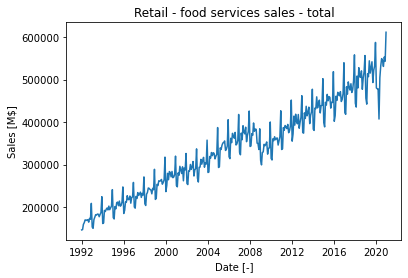

In [210]:
X=df['Date']
Y=df['sales']
plt.plot(X,Y)
plt.ylabel('Sales [M$]')
plt.xlabel('Date [-]')
plt.title('Retail - food services sales - total')

Text(0.5, 1.0, 'Retail - food services sales - total')

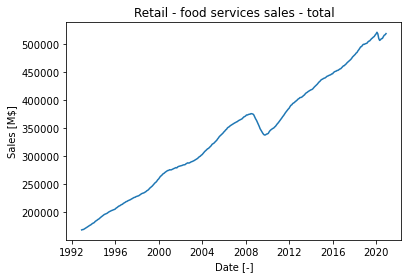

In [211]:
X=df['Date']
Y=df['sales'].rolling(12).mean()
plt.plot(X,Y)
plt.ylabel('Sales [M$]')
plt.xlabel('Date [-]')
plt.title('Retail - food services sales - total')

In [212]:
db=yaml.safe_load(open('db.yaml'))
config={
    'user':db['user'],
    'password':db['pwrd'],
    'host':db['host'],
    'database':db['db']
}
cnx=mysql.connector.connect(**config)

query=("""SELECT 
    `Date`, `Book stores`, `Sporting goods stores` , `Hobby - toy - - game stores`
    FROM mrts_table""")

df=pd.read_sql(query, con = cnx)

cnx.close()

In [213]:
X=df['Date']
Y=df['Book stores']
Z=df['Sporting goods stores']
U=df['Hobby - toy - - game stores']

Text(0.5, 1.0, 'Sales')

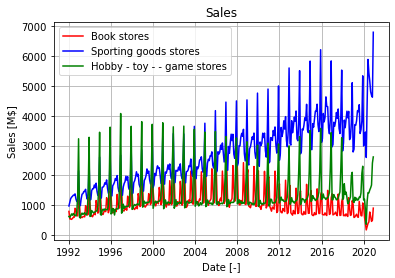

In [214]:
plt.plot(X, Y, label='Book stores', color='r')
plt.plot(X, Z, label='Sporting goods stores', color='b')
plt.plot(X, U, label='Hobby - toy - - game stores', color='g')
plt.grid(True)
plt.legend()
plt.ylabel('Sales [M$]')
plt.xlabel('Date [-]')
plt.title('Sales')

Text(0.5, 1.0, 'Sales')

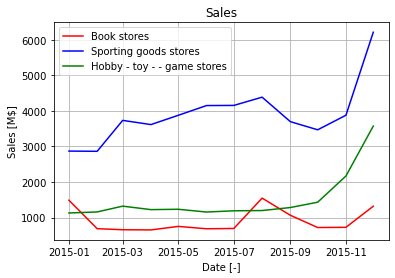

In [215]:
Year=2015
plt.plot(X[X.dt.year==Year], Y[X.dt.year==Year], label='Book stores', color='r')
plt.plot(X[X.dt.year==Year], Z[X.dt.year==Year], label='Sporting goods stores', color='b')
plt.plot(X[X.dt.year==Year], U[X.dt.year==Year], label='Hobby - toy - - game stores', color='g')
plt.grid(True)
plt.legend()
plt.ylabel('Sales [M$]')
plt.xlabel('Date [-]')
plt.title('Sales')

In [190]:
Books_month = pd.DataFrame()
moonth=np.arange(1,13,1)
Books_month.index=moonth
for Year in np.arange(1992,2021,1):
    Books_month[Year]=df[df['Date'].dt.year==Year]['Book stores'].values 
Books_month

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,790,998,1053,1308,1373,1558,1463,1514,1505,1585,...,1950,1716,1660,1479,1487,1424,1380,1219,1029,990
2,539,568,635,718,757,825,921,990,1090,1070,...,960,821,742,727,686,687,672,646,585,593
3,535,602,634,695,743,813,882,976,1031,1062,...,881,756,707,680,656,681,690,665,603,406
4,523,583,610,688,750,806,854,933,975,934,...,797,742,664,679,651,671,712,638,650,169
5,552,612,684,785,853,894,919,976,1104,1070,...,936,887,821,789,750,741,766,707,696,275
6,589,618,724,808,838,875,939,1031,1122,1077,...,902,839,724,698,683,677,685,647,613,388
7,592,607,678,782,786,830,881,1023,1048,1005,...,865,785,705,702,692,652,647,620,591,437
8,894,983,1154,1248,1359,1301,1385,1386,1594,1820,...,2142,1836,1568,1698,1546,1496,1370,1247,1124,770
9,861,903,1022,1102,1040,1158,1246,1240,1406,1406,...,1335,1097,1106,1067,1063,1037,976,886,871,620
10,645,669,732,746,899,923,953,1019,1014,1015,...,751,717,718,725,718,688,654,654,650,455


Text(0.5, 1.0, 'Books Sales')

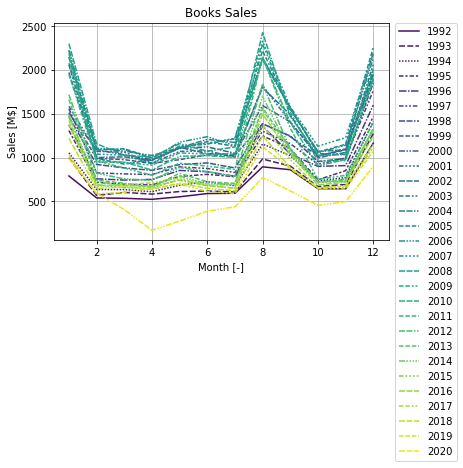

In [191]:
sns.lineplot(data=Books_month,palette='viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.ylabel('Sales [M$]')
plt.xlabel('Month [-]')
plt.title('Books Sales')

In [192]:
Hobby_month = pd.DataFrame()
moonth=np.arange(1,13,1)
Hobby_month.index=moonth
for Year in np.arange(1992,2021,1):
    Hobby_month[Year]=df[df['Date'].dt.year==Year]['Hobby - toy - - game stores'].values 
Hobby_month

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,620,598,618,683,705,730,858,933,893,880,...,972,1072,1029,1020,1127,1191,1182,1187,1131,1174
2,585,576,637,665,737,791,883,966,1002,971,...,1030,1192,1079,1091,1157,1221,1181,1230,1088,1200
3,643,683,819,823,890,1032,987,1135,1106,1176,...,1201,1270,1250,1221,1320,1374,1355,1720,1265,862
4,706,735,782,867,862,896,1022,1076,1136,1063,...,1192,1156,1117,1204,1222,1250,1278,1358,1159,360
5,660,685,742,821,669,947,986,1061,1072,1038,...,1073,1186,1127,1178,1232,1243,1247,1438,1235,1120
6,721,722,758,873,849,940,1016,1101,1098,1107,...,1069,1130,1067,1088,1154,1188,1178,1259,1169,1420
7,678,745,778,851,877,963,1042,1083,1124,1094,...,1089,1123,1118,1186,1189,1239,1193,1046,1178,1409
8,653,682,801,846,874,958,1025,1101,1132,1065,...,1074,1126,1156,1189,1196,1239,1243,1100,1269,1508
9,638,671,806,846,870,971,1005,1111,1175,1050,...,1151,1158,1172,1254,1281,1315,1348,1182,1254,1582
10,789,799,987,993,1094,1141,1197,1277,1285,1303,...,1252,1275,1351,1358,1431,1428,1445,1282,1407,1674


Text(0.5, 1.0, 'Hobby goods sales')

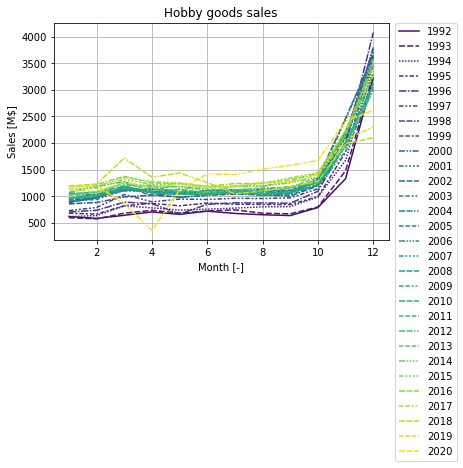

In [159]:
sns.lineplot(data=Hobby_month,palette='viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.ylabel('Sales [M$]')
plt.xlabel('Month [-]')
plt.title('Hobby goods sales')

In [160]:
Sporting_month = pd.DataFrame()
moonth=np.arange(1,13,1)
Sporting_month.index=moonth
for Year in np.arange(1992,2021,1):
    Sporting_month[Year]=df[df['Date'].dt.year==Year]['Sporting goods stores'].values 
Sporting_month

,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,972,1032,1168,1224,1327,1337,1381,1485,1591,1739,...,2414,2505,3071,2720,2869,3104,2955,2816,2784,2984
2,1100,984,1193,1248,1309,1331,1407,1469,1681,1704,...,2456,2723,3015,2801,2863,3235,3030,3076,2876,3107
3,1214,1213,1488,1599,1649,1609,1754,1827,2065,2111,...,3266,3607,3831,3550,3733,4075,3780,3853,3700,3452
4,1267,1367,1551,1606,1702,1726,1820,1888,1991,2071,...,3246,3304,3427,3517,3615,3792,3645,3597,3678,2599
5,1293,1387,1551,1645,1773,1788,1938,1993,2187,2185,...,3169,3455,3656,3678,3876,3939,3802,3859,3826,4378
6,1334,1457,1677,1750,1895,1970,2120,2215,2319,2352,...,3505,3829,3953,3931,4150,4631,4108,4151,4165,5887
7,1340,1457,1584,1705,1833,1838,1975,2062,2237,2199,...,3334,3551,3818,3839,4154,4314,3916,3928,4133,5435
8,1377,1531,1737,1846,1992,1955,2038,2143,2257,2382,...,3623,3969,4158,4382,4386,4302,4225,4145,4368,5163
9,1206,1313,1470,1569,1594,1595,1701,1847,2007,1984,...,3011,3161,3229,3516,3697,3587,3573,3198,3403,4803
10,1120,1199,1324,1398,1453,1521,1607,1711,1725,1882,...,2746,2959,3160,3432,3468,3395,3402,3266,3526,4684


Text(0.5, 1.0, 'Sporting goods sales')

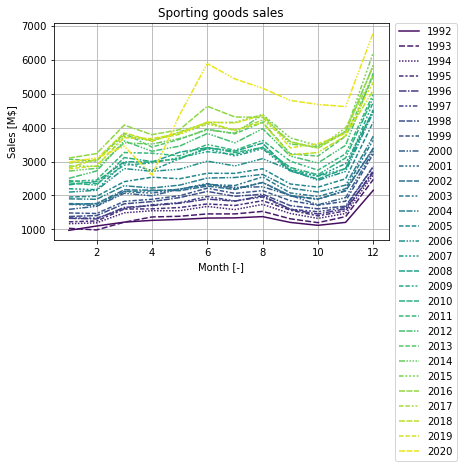

In [161]:
sns.lineplot(data=Sporting_month,palette='viridis')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid(True)
plt.ylabel('Sales [M$]')
plt.xlabel('Month [-]')
plt.title('Sporting goods sales')

In [162]:
db=yaml.safe_load(open('db.yaml'))
config={
    'user':db['user'],
    'password':db['pwrd'],
    'host':db['host'],
    'database':db['db']
}
cnx=mysql.connector.connect(**config)

query=("""SELECT *, year(Date) as Year
FROM mrts_table
group by Year""")

df=pd.read_sql(query, con = cnx)

cnx.close()

In [163]:
df.drop(columns='Date',axis=0,inplace=True)
df.index=df['Year']
#df.drop(columns='Year',axis=0,inplace=True)

In [164]:
df

,Retail - food services sales - total,Retail sales - food services excl motor vehicle - parts,Retail sales - food services excl gasoline stations,Retail sales - food services excl mv - p - gs,Retail sales - total,Retail sales - total excl. motor vehicle - parts dealers,GAFO1,Motor vehicle - parts dealers,Automobile - other motor vehicle dealers,Automobile dealers,...,Used merch-ise stores,Nonstore retailers,Electronic shopping - mail-order houses,Fuel dealers,Food services - drinking places,Drinking places,Restaurants - other eating places,Full service restaurants,Limited service eating places,Year
Year,,,,,,,,,,,,,,,,,,,,,
1992,146376,116565,134277,104466,130683,100872,33906,29811,26788,25800,...,371,6860,2692,1916,15693,1049,13325,6887,6438,1992
1993,153221,121021,140694,108494,137020,104820,36694,32200,29054,27823,...,403,6723,3057,1893,16201,959,13975,6830,7145,1993
1994,161349,124850,148635,112136,145276,108777,38169,36499,33029,32059,...,423,7845,3532,2419,16073,906,13914,6968,6946,1994
1995,175344,134789,161473,120918,158004,117449,42081,40555,36800,35487,...,451,8346,3939,2152,17340,910,15133,7475,7658,1995
1996,185019,140160,170546,125687,167372,122513,43533,44859,40774,39261,...,481,9546,4549,2865,17647,993,15338,7503,7835,1996
1997,200389,151994,184433,136038,181073,132678,47409,48395,44005,42327,...,621,10532,5042,3016,19316,1051,16718,8658,8060,1997
1998,207853,158132,192618,142897,187445,137724,50777,49721,45243,43371,...,633,10470,5794,2324,20408,1108,17721,9109,8612,1998
1999,218126,165591,203011,150476,196810,144275,54153,52535,48047,46157,...,639,11463,6491,2256,21316,1102,18497,9535,8962,1999
2000,236422,177649,218729,159956,213709,154936,57190,58773,54082,51413,...,682,13786,8087,2920,22713,1196,19529,10045,9484,2000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Book stores'>

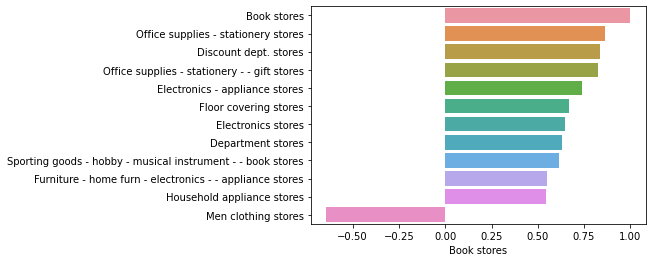

In [165]:
corr=df.corr()
X1=corr[(corr['Book stores'].values>0.5) | (corr['Book stores'].values<-0.5)]['Book stores'].sort_values(ascending=False)
Y1=corr[(corr['Book stores'].values>0.5) | (corr['Book stores'].values<-0.5)]['Book stores'].sort_values(ascending=False).index
sns.barplot(X1,Y1)

In [166]:
db=yaml.safe_load(open('db.yaml'))
config={
    'user':db['user'],
    'password':db['pwrd'],
    'host':db['host'],
    'database':db['db']
}
cnx=mysql.connector.connect(**config)

query=("""SELECT `Date`, `Men clothing stores`, `Women clothing stores`
FROM mrts_table""")

Clothing=pd.read_sql(query, con = cnx)

cnx.close()

In [167]:
Clothing

,Date,Men clothing stores,Women clothing stores
0,1992-01-01,701,1873
1,1992-02-01,658,1991
2,1992-03-01,731,2403
3,1992-04-01,816,2665
4,1992-05-01,856,2752
...,...,...,...
343,2020-08-01,379,2386
344,2020-09-01,401,2494
345,2020-10-01,0,2634
346,2020-11-01,0,2726


In [168]:
Clothing['Total']=Clothing['Men clothing stores']+Clothing['Women clothing stores']
Clothing['Percent Men']=Clothing['Men clothing stores']/Clothing['Total']*100
Clothing['Percent Women']=Clothing['Women clothing stores']/Clothing['Total']*100

In [169]:
Clothing

,Date,Men clothing stores,Women clothing stores,Total,Percent Men,Percent Women
0,1992-01-01,701,1873,2574,27.233877,72.766123
1,1992-02-01,658,1991,2649,24.839562,75.160438
2,1992-03-01,731,2403,3134,23.324825,76.675175
3,1992-04-01,816,2665,3481,23.441540,76.558460
4,1992-05-01,856,2752,3608,23.725055,76.274945
...,...,...,...,...,...,...
343,2020-08-01,379,2386,2765,13.707052,86.292948
344,2020-09-01,401,2494,2895,13.851468,86.148532
345,2020-10-01,0,2634,2634,0.000000,100.000000
346,2020-11-01,0,2726,2726,0.000000,100.000000


Text(0.5, 0, 'Date [-]')

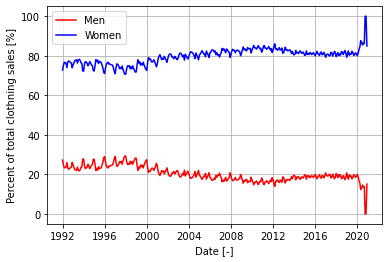

In [170]:
X=Clothing['Date']
Y=Clothing['Percent Men']
Z=Clothing['Percent Women']
plt.plot(X, Y, label='Men', color='r')
plt.plot(X, Z, label='Women', color='b')
plt.grid(True)
plt.legend()
plt.ylabel('Percent of total clothning sales [%]')
plt.xlabel('Date [-]')

In [171]:
db=yaml.safe_load(open('db.yaml'))
config={
    'user':db['user'],
    'password':db['pwrd'],
    'host':db['host'],
    'database':db['db']
}
cnx=mysql.connector.connect(**config)

query=("""SELECT year(Date) as Year, `Men clothing stores`, `Women clothing stores`
FROM mrts_table
group by Year""")

Clothing_Year=pd.read_sql(query, con = cnx)

cnx.close()

In [172]:
Clothing_Year['Total']=Clothing_Year['Men clothing stores']+Clothing_Year['Women clothing stores']
Clothing_Year['Yearly growth Men']=Clothing_Year['Men clothing stores'].pct_change(periods=1)*100
Clothing_Year['Yearly growth Women']=Clothing_Year['Women clothing stores'].pct_change(periods=1)*100
Clothing_Year['Yearly Total growth']=Clothing_Year['Total'].pct_change(periods=1)*100

In [173]:
Clothing_Year.drop(index=0,inplace=True)

Text(0.5, 0, 'Year [-]')

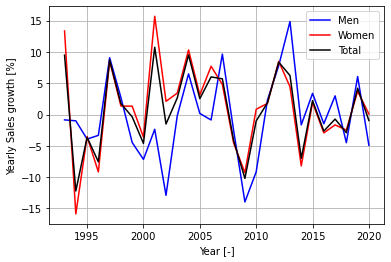

In [177]:
X=Clothing_Year['Year']
Y=Clothing_Year['Yearly growth Men']
Z=Clothing_Year['Yearly growth Women']
U=Clothing_Year['Yearly Total growth']
plt.plot(X, Y, label='Men', color='b')
plt.plot(X, Z, label='Women', color='r')
plt.plot(X, U, label='Total', color='k')
plt.grid(True)
plt.legend()
plt.ylabel('Yearly Sales growth [%]')
plt.xlabel('Year [-]')

Text(0.5, 0, 'Year [-]')

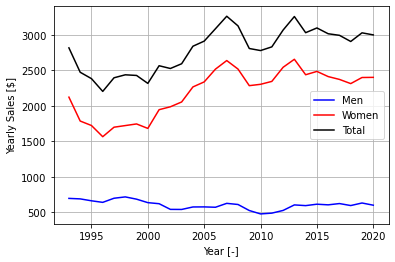

In [222]:
X=Clothing_Year['Year']
Y=Clothing_Year['Men clothing stores']
Z=Clothing_Year['Women clothing stores']
U=Clothing_Year['Total']
plt.plot(X, Y, label='Men', color='b')
plt.plot(X, Z, label='Women', color='r')
plt.plot(X, U, label='Total', color='k')
plt.grid(True)
plt.legend()
plt.ylabel('Yearly Sales [$]')
plt.xlabel('Year [-]')